# Mental Health Analysis

## Overview

## Business Problem

## Data Understanding

The data comes from [kaggle.com](https://www.kaggle.com/datasets/sonia22222/students-mental-health-assessments?select=students_mental_health_survey.csv). It consists of over 7,000 mental health surveys where college students provided information regarding their courses, sleep quality, physical activity, social support, and many more aspects of their lives. In this project I will be converting the Depression_Score to a binary target. Three or higher is Yes, this student has depression, and two or below means no, this student does not have depression. My goal is to find which aspects of a student's life has the greatest impact on their probability of having depression. 

In [2]:
#Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize, OneHotEncoder, StandardScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import pickle
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
# Read the data in to a dataframe
df = pd.read_csv('data/students_mental_health_survey.csv')

In [25]:
df.head()

Age            Course  Gender  CGPA  Stress_Level  Depression_Score  \
0   25            Others    Male  3.56             3                 3   
1   24       Engineering  Female  2.44             0                 3   
2   19          Business  Female  3.74             4                 0   
3   19  Computer Science    Male  3.65             2                 1   
4   18          Business    Male  3.40             3                 3   

   Anxiety_Score Sleep_Quality Physical_Activity Diet_Quality Social_Support  \
0              2          Good          Moderate         Good       Moderate   
1              0       Average               Low      Average            Low   
2              3          Good               Low      Average       Moderate   
3              0       Average               Low      Average       Moderate   
4              4          Good               Low      Average           High   

  Relationship_Status Substance_Use Counseling_Service_Use Family_History  \
0             Married         Never                  Never             No   
1              Single  Occasionally           Occasionally             No   
2   In a Relationship         Never           Occasionally             No   
3              Single           NaN                  Never             No   
4             Married         Never                  Never             No   

  Chronic_Illness  Financial_Stress Extracurricular_Involvement  \
0              No                 2                    Moderate   
1              No                 3                         Low   
2              No                 4                        High   
3              No                 4                    Moderate   
4             Yes                 0                        High   

   Semester_Credit_Load Residence_Type  
0                    17      On-Campus  
1                    27      On-Campus  
2                    15      On-Campus  
3                    20     Off-Campus  
4                    23      On-Campus

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          7022 non-null   int64  
 1   Course                       7022 non-null   object 
 2   Gender                       7022 non-null   object 
 3   CGPA                         7010 non-null   float64
 4   Stress_Level                 7022 non-null   int64  
 5   Depression_Score             7022 non-null   int64  
 6   Anxiety_Score                7022 non-null   int64  
 7   Sleep_Quality                7022 non-null   object 
 8   Physical_Activity            7022 non-null   object 
 9   Diet_Quality                 7022 non-null   object 
 10  Social_Support               7022 non-null   object 
 11  Relationship_Status          7022 non-null   object 
 12  Substance_Use                7007 non-null   object 
 13  Counseling_Service

In [27]:
df.describe()

Age        CGPA  Stress_Level  Depression_Score  Anxiety_Score  \
count  7022.000000  7010.00000   7022.000000       7022.000000    7022.000000   
mean     23.003418     3.49127      2.427941          2.254486       2.300484   
std       3.853978     0.28742      1.638408          1.625193       1.624305   
min      18.000000     2.44000      0.000000          0.000000       0.000000   
25%      20.000000     3.29000      1.000000          1.000000       1.000000   
50%      22.000000     3.50000      2.000000          2.000000       2.000000   
75%      25.000000     3.70000      4.000000          3.000000       4.000000   
max      35.000000     4.00000      5.000000          5.000000       5.000000   

       Financial_Stress  Semester_Credit_Load  
count       7022.000000           7022.000000  
mean           2.453005             22.010538  
std            1.708995              4.358380  
min            0.000000             15.000000  
25%            1.000000             18.000000  
50%            2.000000             22.000000  
75%            4.000000             26.000000  
max            5.000000             29.000000

In [34]:
df['Sleep_Quality'].value_counts()

Good       3579
Average    2721
Poor        695
Name: Sleep_Quality, dtype: int64

In [35]:
df['Physical_Activity'].value_counts()

Moderate    3505
Low         2085
High        1405
Name: Physical_Activity, dtype: int64

In [36]:
df['Diet_Quality'].value_counts()

Average    4253
Good       1379
Poor       1363
Name: Diet_Quality, dtype: int64

In [37]:
df['Social_Support'].value_counts()

Moderate    3457
High        2165
Low         1373
Name: Social_Support, dtype: int64

In [38]:
df['Relationship_Status'].value_counts()

Single               3562
In a Relationship    2069
Married              1364
Name: Relationship_Status, dtype: int64

In [39]:
df['Substance_Use'].value_counts()

Never           5894
Occasionally     697
Frequently       404
Name: Substance_Use, dtype: int64

In [40]:
df['Counseling_Service_Use'].value_counts()

Never           4250
Occasionally    2069
Frequently       676
Name: Counseling_Service_Use, dtype: int64

In [41]:
df['Family_History'].value_counts()

No     4844
Yes    2151
Name: Family_History, dtype: int64

In [42]:
df['Chronic_Illness'].value_counts()

No     6652
Yes     343
Name: Chronic_Illness, dtype: int64

In [43]:
df['Financial_Stress'].value_counts()

0    1225
1    1181
2    1168
4    1156
3    1152
5    1113
Name: Financial_Stress, dtype: int64

In [44]:
df['Extracurricular_Involvement'].value_counts()

Moderate    3426
Low         2157
High        1412
Name: Extracurricular_Involvement, dtype: int64

In [45]:
df['Semester_Credit_Load'].value_counts()

27    511
17    506
28    490
15    471
18    467
19    466
16    465
24    463
29    460
25    458
26    455
22    455
23    446
21    443
20    439
Name: Semester_Credit_Load, dtype: int64

In [46]:
df['Age'].value_counts()

21    776
18    735
20    721
19    708
22    690
23    637
24    537
26    454
25    454
27    323
28    257
29    188
30    162
31    124
32     98
33     55
34     45
35     31
Name: Age, dtype: int64

In [48]:
df['Extracurricular_Involvement'].value_counts()

Moderate    3426
Low         2157
High        1412
Name: Extracurricular_Involvement, dtype: int64

In [49]:
df['Depression_Score'].value_counts()

3    1385
1    1303
2    1300
0    1288
4     878
5     841
Name: Depression_Score, dtype: int64

## Data Preparation

In order to prepare the data for preprocessing, I first dropped the 27 rows containing null values. Once I was working with a clean dataset, I then created a binary column for Depression. In the survey, students selected a number between 0 and 5 for their Depression. I created a column titled 'Depression Binary' that had 'Yes' if the depression score was 3 or higher, and 'No' if the depression score below 3. I did this in order to create a binary classification model. This type of model simplifies the process for the schools as they can use this to determine whether a student is more or less likely to need additional support. 

After this, the preprocessing steps performed included:

* scaling numerical columns
* one-hot encoding categorical columns
* ordinal encoding hierarchical categorical columns 

In [4]:
df.isna().sum()

Age                             0
Course                          0
Gender                          0
CGPA                           12
Stress_Level                    0
Depression_Score                0
Anxiety_Score                   0
Sleep_Quality                   0
Physical_Activity               0
Diet_Quality                    0
Social_Support                  0
Relationship_Status             0
Substance_Use                  15
Counseling_Service_Use          0
Family_History                  0
Chronic_Illness                 0
Financial_Stress                0
Extracurricular_Involvement     0
Semester_Credit_Load            0
Residence_Type                  0
dtype: int64

Dropped the 27 rows (.38% of the dataset) with null values.

In [5]:
# Drop Nulls
df.dropna(inplace=True)

In [6]:
# Confirm dropping Nulls worked
df.isna().sum()

Age                            0
Course                         0
Gender                         0
CGPA                           0
Stress_Level                   0
Depression_Score               0
Anxiety_Score                  0
Sleep_Quality                  0
Physical_Activity              0
Diet_Quality                   0
Social_Support                 0
Relationship_Status            0
Substance_Use                  0
Counseling_Service_Use         0
Family_History                 0
Chronic_Illness                0
Financial_Stress               0
Extracurricular_Involvement    0
Semester_Credit_Load           0
Residence_Type                 0
dtype: int64

In order to create a binary classification model, I converted the Depression Score into a Depression Binary of 'Yes' or 'No.' This way the school will be able to see at a high level which students are more likely to need additional support. 

In [9]:
# Create Binary Depression column for target variable
df.loc[df['Depression_Score'] >= 3, 'Depression_Binary'] = 'Yes'
df.loc[df['Depression_Score'] < 3, 'Depression_Binary'] = 'No'
df.drop('Depression_Score', axis=1, inplace=True)

KeyError: 'Depression_Score'

### Preprocessing Data

The following numerical columns were scaled:
* Age, Semester Credit Load, CGPA <br>
These columns had numerical, continuous values. 

The following categorical columns were one-hot encoded:
* Course, Gender, Relationship Status, Family History, Residence Type, Chronic Illness <br>
These columns had categorical values with no rank or order.

The following hierarchical categorical columns were ordinal encoded:
* Sleep Quality, Physical Activity, Diet Quality, Social Support, Substance Use, Counseling Service Use, Extracurricular Involvement <br>
These columns had hierarchical categories that had an inherent order. 
For example, Sleep Quality was either 'Poor', 'Average', or 'Good' and Social Support was either 'Low', 'Moderate', or 'High'. 

In [50]:
# Define columns for scaling, one hot encoding, and ordinal encoding
continuous_cols = ['Age', 'Semester_Credit_Load', 'CGPA']
ohe_cols = ['Course', 'Gender', 'Relationship_Status', 'Family_History', 'Residence_Type', 'Chronic_Illness']
ordinal_cols = ['Sleep_Quality', 'Physical_Activity', 'Diet_Quality', 'Social_Support', 'Substance_Use', 
               'Counseling_Service_Use', 'Extracurricular_Involvement']

# Order Ordinal Column Entries
sleep_ord = ['Poor', 'Average', 'Good']
phys_ord = ['Low', 'Moderate', 'High']
diet_ord = ['Poor', 'Average', 'Good']
social_ord = ['Low', 'Moderate', 'High']
subst_ord = ['Never', 'Occasionally', 'Frequently']
counsel_ord = ['Never', 'Occasionally', 'Frequently']
extracurric_ord = ['Low', 'Moderate', 'High']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(remainder='passthrough',
    transformers=[
        ('num', StandardScaler(), continuous_cols),  
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe_cols),
        ('ord', OrdinalEncoder(categories=[sleep_ord, phys_ord, diet_ord, 
                                           social_ord, subst_ord, counsel_ord, extracurric_ord]), 
         ordinal_cols)])

Once all the actions above were completed, the data was ready for a train/test split in order to begin the modeling process.

In [11]:
y = df.pop('Depression_Binary')
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=333)

In [55]:
X_train

Age  Semester_Credit_Load      CGPA  Course_Business  \
4575 -0.519599             -1.149245 -1.431202              0.0   
109  -0.000927             -1.378589 -1.361599              0.0   
302  -0.260263             -0.461213  0.552494              1.0   
4528  0.258409              1.602883 -0.178342              0.0   
4380  0.777081              1.373539 -0.456755              0.0   
...        ...                   ...       ...              ...   
5494 -0.260263             -0.690557 -1.466004              0.0   
6067  0.517745             -1.378589  0.482890              1.0   
1443  0.517745             -1.149245 -0.839574              0.0   
973  -0.000927             -0.002525  0.830907              0.0   
5900 -0.260263             -0.002525 -0.630764              0.0   

      Course_Computer Science  Course_Engineering  Course_Law  Course_Medical  \
4575                      0.0                 1.0         0.0             0.0   
109                       0.0                 1.0         0.0             0.0   
302                       0.0                 0.0         0.0             0.0   
4528                      0.0                 1.0         0.0             0.0   
4380                      0.0                 0.0         1.0             0.0   
...                       ...                 ...         ...             ...   
5494                      0.0                 0.0         0.0             1.0   
6067                      0.0                 0.0         0.0             0.0   
1443                      0.0                 0.0         1.0             0.0   
973                       0.0                 1.0         0.0             0.0   
5900                      0.0                 0.0         0.0             1.0   

      Course_Others  Gender_Female  ...  Chronic_Illness_Yes  Stress_Level  \
4575            0.0            1.0  ...                  0.0           0.0   
109             0.0            1.0  ...                  0.0           0.0   
302             0.0            1.0  ...                  0.0           2.0   
4528            0.0            0.0  ...                  0.0           5.0   
4380            0.0            0.0  ...                  0.0           1.0   
...             ...            ...  ...                  ...           ...   
5494            0.0            1.0  ...                  0.0           1.0   
6067            0.0            1.0  ...                  0.0           1.0   
1443            0.0            0.0  ...                  1.0           2.0   
973             0.0            1.0  ...                  0.0           2.0   
5900            0.0            1.0  ...                  1.0           5.0   

      Anxiety_Score  Sleep_Quality  Physical_Activity  Diet_Quality  \
4575            3.0            2.0                0.0           2.0   
109             0.0            2.0                2.0           2.0   
302             2.0            2.0                1.0           0.0   
4528            3.0            1.0                1.0           1.0   
4380            0.0            0.0                1.0           1.0   
...             ...            ...                ...           ...   
5494            5.0            1.0                0.0           1.0   
6067            3.0            2.0                0.0           1.0   
1443            5.0            2.0                0.0           1.0   
973             3.0            1.0                1.0           0.0   
5900            3.0            1.0                1.0           2.0   

      Social_Support  Substance_Use  Counseling_Service_Use  \
4575             2.0            0.0                     0.0   
109              2.0            0.0                     0.0   
302              1.0            0.0                     0.0   
4528             0.0            0.0                     0.0   
4380             1.0            0.0                     0.0   
...              ...            ...                     ...   
54

In [56]:
y_train.value_counts()

No     2940
Yes    2306
Name: Depression_Binary, dtype: int64

## Modeling

In order to analyze the performance of the models I built, I focused on recall. This model could be used at schools to help determine which students may need additional support in and out of the classroom. I decided it was best to minimize false negatives (saying a student is less likely to have depression when they are actually more likely), because that would be neglecting to offer additional support when it is needed. A false positive on the other hand, would be a small cost to the school, but ultimately would just give more support to a student, which is never a bad thing. 

For this problem I needed to use classification models. There are many options to use and I wasn't sure which would be most appropriate so I created a wide variety. First, I started with a decision tree purposefully trying to overfit the model to confirm that we had the right data in order to build a successful predictive model.

Every iteration of our models from then on was highly focused on reducing overfitting while maintaining or increasing the recall score.

## Evaluation

In order to evaluate the models consistently, I created a function that would show each model's cross validation and training scores for recall, f1, and accuracy. It also showed a confusion matrix for a visual of a breakdown of the model's predictions. 

### Dummy Model Classifier

In [57]:
# Instantiate dummy model that will always predict Yes
dummy_model = DummyClassifier(strategy="constant", constant='Yes')
dummy_model.fit(X_train, y_train)
y_pred = dummy_model.predict(X_train)

print('Recall: ', recall_score(y_train, y_pred, pos_label='Yes'))
print('F1: ', f1_score(y_train, y_pred, pos_label='Yes'))
print('Accuracy: ', accuracy_score(y_train, y_pred))

Recall:  1.0
F1:  0.6106991525423728
Accuracy:  0.4395730080060999


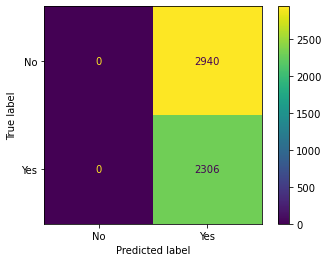

In [58]:
# Creating confusion matrix
cf = confusion_matrix(y_train, y_pred)
# Displaying confusion matrix
ConfusionMatrixDisplay(cf, display_labels=['No', 'Yes']).plot()

In [59]:
recall_scorer = make_scorer(recall_score, pos_label='Yes')
f1_scorer = make_scorer(f1_score, pos_label='Yes')

In [60]:
# Cross Validation Scores
print('CV Recall: ', cross_val_score(dummy_model, X_train, y_train, scoring=recall_scorer).mean())
print('CV F1: ', cross_val_score(dummy_model, X_train, y_train, scoring=f1_scorer).mean())
print('CV Accuracy: ', cross_val_score(dummy_model, X_train, y_train).mean())

CV Recall:  1.0
CV F1:  0.6106990434142753
CV Accuracy:  0.43957292659675884


### First Model: Decision Tree 

In [61]:
# Creating steps for a Pipeline 
tree_steps = [('smote', SMOTE(random_state=333)),
              ('tree', DecisionTreeClassifier())]
# Feeding the Pipeline the steps defined above
tree_pipe = Pipeline(tree_steps)
# Fitting the training data to the Pipeline
tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=333)),
                ('tree', DecisionTreeClassifier())])

In [62]:
# Defining the predictions from the Pipeline using the training data
y_pred = tree_pipe.predict(X_train)
# Evaluating the accuracy score on the training data
print('Recall: ', recall_score(y_train, y_pred, pos_label='Yes'))
print('F1: ', f1_score(y_train, y_pred, pos_label='Yes'))
print('Accuracy: ', accuracy_score(y_train, y_pred))

Recall:  1.0
F1:  1.0
Accuracy:  1.0


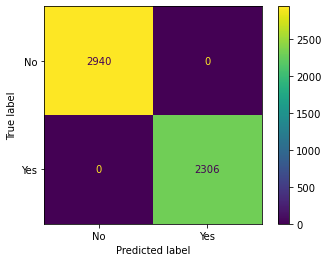

In [63]:
# Creating confusion matrix
cf = confusion_matrix(y_train, y_pred)
# Displaying confusion matrix
ConfusionMatrixDisplay(cf, display_labels=['No', 'Yes']).plot()

In [64]:
# Cross Validation Scores
print('CV Recall: ', cross_val_score(tree_pipe, X_train, y_train, scoring=recall_scorer).mean())
print('CV F1: ', cross_val_score(tree_pipe, X_train, y_train, scoring=f1_scorer).mean())
print('CV Accuracy: ', cross_val_score(tree_pipe, X_train, y_train).mean())

CV Recall:  0.4813449023861171
CV F1:  0.47307087800820796
CV Accuracy:  0.5284011076308504


### Second Model: Random Forest

In [65]:
# Creating steps for a Pipeline 
forest_steps = [('smote', SMOTE(random_state=333)),
                ('forest', RandomForestClassifier(random_state=333))]
# Feeding the Pipeline the steps defined above
forest_pipe = Pipeline(forest_steps)
# Fitting the training data to the Pipeline
forest_pipe.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=333)),
                ('forest', RandomForestClassifier(random_state=333))])

In [66]:
# Scores for model
# Defining the predictions from the Pipeline using the training data
y_pred = forest_pipe.predict(X_train)
# Evaluating the accuracy score on the training data
print('Recall: ', recall_score(y_train, y_pred, pos_label='Yes'))
print('F1: ', f1_score(y_train, y_pred, pos_label='Yes'))
print('Accuracy: ', accuracy_score(y_train, y_pred))

Recall:  1.0
F1:  1.0
Accuracy:  1.0


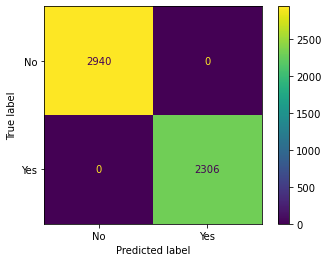

In [67]:
# Creating confusion matrix
cf = confusion_matrix(y_train, y_pred)
# Displaying confusion matrix
ConfusionMatrixDisplay(cf, display_labels=['No', 'Yes']).plot()

In [68]:
# Cross Validation Scores for model
model = forest_pipe
print('CV Recall: ', cross_val_score(forest_pipe, X_train, y_train, scoring=recall_scorer).mean())
print('CV F1: ', cross_val_score(forest_pipe, X_train, y_train, scoring=f1_scorer).mean())
print('CV Accuracy: ', cross_val_score(forest_pipe, X_train, y_train).mean())

CV Recall:  0.3386887154783033
CV F1:  0.4225299892405984
CV Accuracy:  0.5935951700031776


### Random Forest Classifier with GridSearch

In [71]:
##Recall
# Creating parameters for GridSearch
params = {'forest__n_estimators': [50, 100, 150],
          'forest__criterion': ['gini', 'entropy'],
          'forest__max_depth': [10, None],
          'forest__min_samples_split': [1, 2],
          'forest__min_weight_fraction_leaf': [0, .5],
         'forest__max_features': ['auto', None, 15],
          'forest__max_leaf_nodes': [None, 10],
          'forest__min_impurity_decrease': [0, .5],
         }
# GridSearch with the random forest pipeline, parameters above, 5 fold cross validation, and accuracy score
forest_grid1 = GridSearchCV(estimator=forest_pipe, param_grid=params, cv=5, scoring=recall_scorer, verbose=2)
# Fitting the GridSearch
forest_grid1.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/jo

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__m

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 
[CV]  forest__criterion=gini, for

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, for

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=1

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=auto, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0.5, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.6s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 
[CV]  forest__criterion=gini, for

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.5, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 
[CV]  forest__criterion=gini, fore

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=50, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=100, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=1, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0, forest__n_estimators=50, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=10, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0, forest__n_estimators=50 
[CV]  forest__criterion=gini, forest__max_depth=10, for

KeyboardInterrupt: 

In [ ]:
print("Recall")
print(forest_grid1.best_estimator_)
print(forest_grid1.best_score_)

In [ ]:
model = forest_grid1.best_estimator_
# Cross Validation Scores for model
print('CV Recall: ', cross_val_score(model, X_train, y_train, scoring=recall_scorer).mean())
print('CV F1: ', cross_val_score(model, X_train, y_train, scoring=f1_scorer).mean())
print('CV Accuracy: ', cross_val_score(model, X_train, y_train).mean())

#### Updated Params 1

In [98]:
##Recall
# Creating parameters for GridSearch
params = {'forest__n_estimators': [125, 130, 140],
          'forest__criterion': ['gini'],
          'forest__max_depth': [30, 10],
          'forest__min_samples_split': [3, 2],
          'forest__min_weight_fraction_leaf': [.75, .5, .25],
         'forest__max_features': [30, 20, None],
          'forest__max_leaf_nodes': [None, 2],
          'forest__min_impurity_decrease': [0, .25],
         }
# GridSearch with the random forest pipeline, parameters above, 5 fold cross validation, and accuracy score
forest_grid = GridSearchCV(estimator=forest_pipe, param_grid=params, cv=5, scoring=recall_scorer, verbose=2)
# Fitting the GridSearch
forest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/jo

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_dep

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_dept

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, fore

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, 

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, fore

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, 

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, fo

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, fo

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_dept

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_dept

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_dept

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_dept

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, fore

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, 

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, fore

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, 

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, fo

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, for

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, fo

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_dept

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_dept

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, fore

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, fore

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gi

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterio

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gi

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterio

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_dept

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_dept

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, fore

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, fore

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_dep

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.6s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_d

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, fore

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, 

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, fore

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, 

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, fo

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, fo

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_dept

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_dept

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=30, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_dept

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.6s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_d

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, fore

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, 

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, fore

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, 

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, fo

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, fo

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_dept

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_dep

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.3s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=20, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, fore

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, fore

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gi

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterio

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gi

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=None, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterio

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.6s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_dept

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.5s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_dept

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, fore

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=125, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=150, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.75, forest__n_estimators=200, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.5, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__

[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125 
[CV]  forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=125, total=   0.4s
[CV] forest__criterion=gini, forest__max_depth=10, forest__max_features=None, forest__max_leaf_nodes=2, forest__min_impurity_decrease=0.25, forest__min_samples_split=2, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=150 
[CV]  forest__criterion=gini, fore

[Parallel(n_jobs=1)]: Done 2160 out of 2160 | elapsed: 12.8min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=333)),
                                       ('forest',
                                        RandomForestClassifier(random_state=333))]),
             param_grid={'forest__criterion': ['gini'],
                         'forest__max_depth': [30, 10],
                         'forest__max_features': [30, 20, None],
                         'forest__max_leaf_nodes': [None, 2],
                         'forest__min_impurity_decrease': [0, 0.25],
                         'forest__min_samples_split': [3, 2],
                         'forest__min_weight_fraction_leaf': [0.75, 0.5, 0.25],
                         'forest__n_estimators': [125, 150, 200]},
             scoring=make_scorer(recall_score, pos_label=Yes), verbose=2)

In [99]:
print("Recall")
print(forest_grid.best_estimator_)
print(forest_grid.best_score_)

Recall
Pipeline(steps=[('smote', SMOTE(random_state=333)),
                ('forest',
                 RandomForestClassifier(max_depth=30, max_features=30,
                                        max_leaf_nodes=2,
                                        min_impurity_decrease=0,
                                        min_samples_split=3,
                                        min_weight_fraction_leaf=0.25,
                                        n_estimators=125, random_state=333))])
0.7363382821083472


#### Updated Params 2

In [ ]:
##Recall
# Creating parameters for GridSearch
params = {'forest__n_estimators': [30, 40, 45],
          'forest__criterion': ['gini'],
          'forest__max_depth': [30, 20, 40],
          'forest__min_samples_split': [3, 4],
          'forest__min_weight_fraction_leaf': [.2, .3, .25],
         'forest__max_features': [30, 40, 50],
          'forest__max_leaf_nodes': [1, 2, 3],
          'forest__min_impurity_decrease': [0, .1],
         }
# GridSearch with the random forest pipeline, parameters above, 5 fold cross validation, and accuracy score
forest_grid = GridSearchCV(estimator=forest_pipe, param_grid=params, cv=5, scoring=recall_scorer, verbose=2)
# Fitting the GridSearch
forest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/jo

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=40 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=40 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=40 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=40 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=40 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=30 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=30 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=30 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=30 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=30 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__ma

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=40 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=40, total=   0.2s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=40 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=40 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=40 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=30 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=30 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=30 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=30 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=30 
[CV]  forest__criterion=gini, forest__max_depth=30, forest

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=40 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=40 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=40 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=40 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__ma

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=40 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__ma

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=40 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=40 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=40 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=30 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=30 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=30 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=30 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=30 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=40 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=40 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=40 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=40 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=40 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=30 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=30 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=30 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=30 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=30 
[CV]  forest__criterion=gini, forest__max_depth=30, forest

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=40 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=40 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=40 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=40 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=40 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=40 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=40 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=40 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=40 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=30 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=30 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=30 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=30 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=30 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=40 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=40 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=40 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=40 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=40 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.3, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=30 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=30 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=30 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=30 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=30 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=40 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=40 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=40 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=40 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=40 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=40, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=3, forest__min_weight_fraction_leaf=0.25, forest__n_estimators=45, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator

[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30 
[CV]  forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=30, total=   0.1s
[CV] forest__criterion=gini, forest__max_depth=30, forest__max_features=30, forest__max_leaf_nodes=1, forest__min_impurity_decrease=0.1, forest__min_samples_split=4, forest__min_weight_fraction_leaf=0.2, forest__n_estimators=40 


In [85]:
print("Recall")
print(forest_grid.best_estimator_)
print(forest_grid.best_score_)

Recall
Pipeline(steps=[('smote', SMOTE(random_state=333)),
                ('forest',
                 RandomForestClassifier(max_depth=30, max_features=20,
                                        max_leaf_nodes=2,
                                        min_impurity_decrease=0,
                                        min_samples_split=3,
                                        min_weight_fraction_leaf=0.3,
                                        n_estimators=40, random_state=333))])
0.4470588235294118


### Third Model: Logistic Regression

In [48]:
# Creating steps for a Pipeline 
logreg_steps = [('smote', SMOTE(random_state=333)),
                ('logreg', LogisticRegression(random_state=333))]
# Feeding the Pipeline the steps defined above
logreg_pipe = Pipeline(logreg_steps)
# Fitting the training data to the Pipeline
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=333)),
                ('logreg', LogisticRegression(random_state=333))])

In [56]:
# Scores for model
# Defining the predictions from the Pipeline using the training data
y_pred = logreg_pipe.predict(X_train)
# Evaluating the accuracy score on the training data
print('Recall: ', recall_score(y_train, y_pred, pos_label='Yes'))
print('F1: ', f1_score(y_train, y_pred, pos_label='Yes'))
print('Accuracy: ', accuracy_score(y_train, y_pred))

Recall:  0.5803921568627451
F1:  0.11873245086241475
Accuracy:  0.5812047274113611


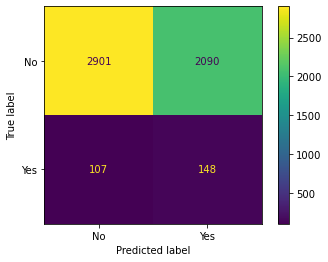

In [57]:
# Creating confusion matrix
cf = confusion_matrix(y_train, y_pred)
# Displaying confusion matrix
ConfusionMatrixDisplay(cf, display_labels=['No', 'Yes']).plot()

In [58]:
# Cross Validation Scores for model
model = logreg_pipe
print('CV Recall: ', cross_val_score(model, X_train, y_train, scoring=recall_scorer).mean())
print('CV F1: ', cross_val_score(model, X_train, y_train, scoring=f1_scorer).mean())
print('CV Accuracy: ', cross_val_score(model, X_train, y_train).mean())

CV Recall:  0.47058823529411764
CV F1:  0.09455463432533699
CV Accuracy:  0.5608058468382586


#### Logistic Regression with GridSearch

In [54]:
# Creating parameters for GridSearch
logreg_params = {'logreg__class_weight':['balanced', None, [1, 10]],
                'logreg__C': [1, 0.0001],
                'logreg__solver': ['lbfgs', 'sag', 'saga'],
                'logreg__max_iter': [100],
                'logreg__penalty': ['l1', 'l2']}
# GridSearch with the logistic regression pipeline, parameters above, 5 fold cross validation, and accuracy score
logreg_grid = GridSearchCV(estimator=logreg_pipe, param_grid=logreg_params, cv=5, scoring=recall_scorer, verbose=2)
# Fitting the GridSearch
logreg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__so

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-pa

[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga 
[CV]  logreg__C=1, logreg__class_weight=bala

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=sag, total=   0.2s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=sag 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=sag, total=   0.2s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=sag 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=sag, total=   0.3s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=sag 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=sag, total=   0.2s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=sag 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=sag, total=   0.2s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga, total=   0.2s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga, total=   0.2s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga, total=   0.2s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga, total=   0.3s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logis

[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga, total=   0.3s
[CV] logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=None, logreg__max_iter=10

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=sag, total=   0.2s
[CV] logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=sag 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=sag, total=   0.2s
[CV] logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=sag 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=sag, total=   0.2s
[CV] logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=sag 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=sag, total=   0.2s
[CV] logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=sag 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=sag, total=   0.2s
[CV] logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga, total=   0.2s
[CV] logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga, total=   0.2s
[CV] logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga, total=   0.2s
[CV] logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga, total=   0.2s
[CV] logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logis

[CV]  logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga, total=   0.2s
[CV] logreg__C=1, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l1, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l1, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l1, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l1, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l1, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l1, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l1, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[1, 10],

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  logreg__C=1, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=sag, total=   0.2s
[CV] logreg__C=1, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=sag 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  logreg__C=1, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=sag, total=   0.2s
[CV] logreg__C=1, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=sag 
[CV]  logreg__C=1, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=sag, total=   0.2s
[CV] logreg__C=1, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=sag 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  logreg__C=1, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=sag, total=   0.2s
[CV] logreg__C=1, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=sag 
[CV]  logreg__C=1, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=sag, total=   0.2s
[CV] logreg__C=1, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  logreg__C=1, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga, total=   0.2s
[CV] logreg__C=1, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  logreg__C=1, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga, total=   0.2s
[CV] logreg__C=1, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  logreg__C=1, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga, total=   0.2s
[CV] logreg__C=1, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  logreg__C=1, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga, total=   0.2s
[CV] logreg__C=1, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logis

[CV]  logreg__C=1, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga, total=   0.2s
[CV] logreg__C=0.0001, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=lbfgs 
[CV]  logreg__C=0.0001, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=0.0001, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=lbfgs 
[CV]  logreg__C=0.0001, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=0.0001, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=lbfgs 
[CV]  logreg__C=0.0001, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=0.0001, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=lbfgs 
[CV

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=0.0001, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga, total=   0.0s
[CV] logreg__C=0.0001, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga 
[CV]  logreg__C=0.0001, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga, total=   0.0s
[CV] logreg__C=0.0001, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga 
[CV]  logreg__C=0.0001, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga, total=   0.0s
[CV] logreg__C=0.0001, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga 
[CV]  logreg__C=0.0001, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga, total=   0.0s
[CV] logreg__C=0.0001, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=0.0001, logreg__cla

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=0.0001, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga, total=   0.0s
[CV] logreg__C=0.0001, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga 
[CV]  logreg__C=0.0001, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga, total=   0.0s
[CV] logreg__C=0.0001, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga 
[CV]  logreg__C=0.0001, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga, total=   0.0s
[CV] logreg__C=0.0001, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=0.0001, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=0.0001, logreg__class_weight=[1, 10], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  log

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   13.7s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=333)),
                                       ('logreg',
                                        LogisticRegression(random_state=333))]),
             param_grid={'logreg__C': [1, 0.0001],
                         'logreg__class_weight': ['balanced', None, [1, 10]],
                         'logreg__max_iter': [100],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['lbfgs', 'sag', 'saga']},
             scoring=make_scorer(recall_score, pos_label=Yes), verbose=2)

In [55]:
print("Recall")
print(logreg_grid.best_estimator_)
print(logreg_grid.best_score_)

Recall
Pipeline(steps=[('smote', SMOTE(random_state=333)),
                ('logreg',
                 LogisticRegression(C=1, class_weight='balanced',
                                    random_state=333))])
0.47058823529411764


#### Updated Params 1

In [61]:
# Creating parameters for GridSearch
logreg_params = {'logreg__class_weight':['balanced', [1, 20], [20, 1], [1, 50]],
                'logreg__C': [1, 10, 100],
                'logreg__solver': ['lbfgs', 'liblinear', 'newton-cg'],
                'logreg__max_iter': [50, 100, 150, 1000],
                'logreg__penalty': ['elasticnet', 'l2', None]}
# GridSearch with the logistic regression pipeline, parameters above, 5 fold cross validation, and accuracy score
logreg_grid = GridSearchCV(estimator=logreg_pipe, param_grid=logreg_params, cv=5, scoring=recall_scorer, verbose=2)
# Fitting the GridSearch
logreg_grid.fit(X_train, y_train)

#LogReg to see parameters when changing params
# LogisticRegression(random_state=333)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=balanced, l

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-pa

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  lo

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=None, logreg__solver=libline

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=elasticn

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logre

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=None, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=None, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=None, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=None, logreg__solver

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__m

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__s

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=1, l

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=None, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=None, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=None, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear 
[CV]  logreg__C=

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalt

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=150, lo

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=None, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=None, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=None, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=None, logreg__solver=libline

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=lbfgs 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=lbfgs 
[CV]  logreg__C=1, l

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__so

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_t

[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=1, logre

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=elasticnet, logre

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=elasticnet, logr

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[20,

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=elasti

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_wei

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=None, logreg__solver

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__pe

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[1, 50],

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=1, l

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=None, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=None, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=None, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=None, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=None, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=None, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=None, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=None, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_wei

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=elasticnet, lo

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=150, lo

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=None, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=None, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=None, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=None, logreg__solver=libline

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=liblinear 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=lbfgs 
[CV]  

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=1, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=elasticn

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_we

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=None, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=None, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=None, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear 
[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear 
[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear 
[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear 
[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear 
[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=None, logreg

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=1000, logreg

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, 

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=None, logreg__solver=liblinear 
[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=None, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=None, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=None

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=50, lo

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=None, logreg__solver=libline

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=elasti

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_we

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=None, logreg__solver=lbfgs 
[CV]  

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalt

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=lbfgs

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=elasticnet, lo

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[20

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=elasti

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_we

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=None, logreg__solver=lbfgs 
[CV]  

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=elasti

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_we

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=None, logreg__solver=lbfgs 
[CV]  

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalt

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=lbfgs

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=elasticnet, lo

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1,

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=None, logreg__solver=lbfgs 
[CV]  logreg__

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=elasti

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_we

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=None, logreg__solver=lbfgs 
[CV]  

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=elasticn

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_we

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=None, logreg__solver=lbfgs 
[CV]  

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=e

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=10, logreg__

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=lbfgs

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=10, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg_

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=None, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=None, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=None, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear 
[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear 
[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=50, logreg__penalty=None, logreg__solver=lib

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear 
[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear 
[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=None, logreg__solver=liblinear 
[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=None

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=liblinear 
[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=balanced, 

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=None, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=None, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=None, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=150, logreg__penalty=None

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=bal

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=balanced, logreg__max_iter=1000, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=elast

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_w

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=None, logreg__solver=lbfgs 
[CV]  

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=50, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=e

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg_

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.2s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=None, logreg__solver=lbfgs

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=None, logreg__solver=liblinear 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=100, logreg__penalty=None, logreg

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=100, log

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=150, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__p

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100,

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=None, logreg__solv

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=[1, 20], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=elasti

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_w

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=None, logreg__solver=lbfgs 
[CV]  

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=50, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=e

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg_

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=None, logreg__solver=lbfgs

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg_

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=None, logreg__solver=lbfgs

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=150, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__p

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100,

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=None, logreg__solv

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[20, 1], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=elasti

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=None, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=50, logreg__penalty=None, logreg__solver

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=l2, logreg__solver=libline

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=100, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=elas

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=liblinear 
[CV]  lo

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=l2, logreg__solver=newton-

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=None, logreg__solver=liblinear 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=None, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=None, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=None, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=150, logreg__penalty=None, logreg

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=liblinear 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=liblinear 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=elasticnet, logreg__solver=newton-cg, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], l

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 930, in _fit_liblinear
    class_weight_ = compute_c

[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver=newton-cg, total=   0.1s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=l2, logreg__solver

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=lbfgs 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=liblinear 
[CV]  logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=liblinear, total=   0.0s
[CV] logreg__C=100, logreg__class_weight=[1, 50], logreg__max_iter=1000, logreg__penalty=None, logreg__solver=lib

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 438, in _check_solver
    raise V

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=333)),
                                       ('logreg',
                                        LogisticRegression(random_state=333))]),
             param_grid={'logreg__C': [1, 10, 100],
                         'logreg__class_weight': ['balanced', [1, 20], [20, 1],
                                                  [1, 50]],
                         'logreg__max_iter': [50, 100, 150, 1000],
                         'logreg__penalty': ['elasticnet', 'l2', None],
                         'logreg__solver': ['lbfgs', 'liblinear', 'newton-cg']},
             scoring=make_scorer(recall_score, pos_label=Yes), verbose=2)

In [60]:
print("Recall")
print(logreg_grid.best_estimator_)
print(logreg_grid.best_score_)

Recall
Pipeline(steps=[('smote', SMOTE(random_state=333)),
                ('logreg',
                 LogisticRegression(C=1, class_weight='balanced', max_iter=50,
                                    random_state=333))])
0.47058823529411764


#### Updated Params 2

In [71]:
# Creating parameters for GridSearch
logreg_params = {'logreg__class_weight':['balanced'],
                'logreg__C': [1, .01, .001],
                'logreg__solver': ['lbfgs'],
                'logreg__max_iter': [100, 125, 200, 300],
                'logreg__penalty': ['l2']}
# GridSearch with the logistic regression pipeline, parameters above, 5 fold cross validation, and accuracy score
logreg_grid = GridSearchCV(estimator=logreg_pipe, param_grid=logreg_params, cv=5, scoring=recall_scorer, verbose=2)
# Fitting the GridSearch
logreg_grid.fit(X_train, y_train)

#LogReg to see parameters when changing params
# LogisticRegression(random_state=333)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=125, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=125, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=125, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=1, logreg__class_wei

[CV]  logreg__C=0.01, logreg__class_weight=balanced, logreg__max_iter=300, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=0.01, logreg__class_weight=balanced, logreg__max_iter=300, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=0.01, logreg__class_weight=balanced, logreg__max_iter=300, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.1s
[CV] logreg__C=0.001, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=0.001, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=0.001, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  logreg__C=0.001, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs, total=   0.0s
[CV] logreg__C=0.001, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs 
[CV]  l

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    3.8s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=333)),
                                       ('logreg',
                                        LogisticRegression(random_state=333))]),
             param_grid={'logreg__C': [1, 0.01, 0.001],
                         'logreg__class_weight': ['balanced'],
                         'logreg__max_iter': [100, 125, 200, 300],
                         'logreg__penalty': ['l2'],
                         'logreg__solver': ['lbfgs']},
             scoring=make_scorer(recall_score, pos_label=Yes), verbose=2)

In [67]:
print("Recall")
print(logreg_grid.best_estimator_)
print(logreg_grid.best_score_)

Recall
Pipeline(steps=[('smote', SMOTE(random_state=333)),
                ('logreg',
                 LogisticRegression(C=1, class_weight='balanced', max_iter=40,
                                    random_state=333))])
0.47058823529411764


In [72]:
# Cross Validation Scores for model
model = logreg_grid.best_estimator_
print('CV Recall: ', cross_val_score(model, X_train, y_train, scoring=recall_scorer).mean())
print('CV F1: ', cross_val_score(model, X_train, y_train, scoring=f1_scorer).mean())
print('CV Accuracy: ', cross_val_score(model, X_train, y_train).mean())

CV Recall:  0.47058823529411764
CV F1:  0.09455463432533699
CV Accuracy:  0.5608058468382586


### Fourth Model: Neural Network

In [87]:
# Creating steps for a Pipeline 
neural_steps = [('smote', SMOTE(random_state=333)),
                ('neural', MLPClassifier(random_state=333))]
# Feeding the Pipeline the steps defined above
neural_pipe = Pipeline(neural_steps)
# Fitting the training data to the Pipeline
neural_pipe.fit(X_train, y_train)

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('smote', SMOTE(random_state=333)),
                ('neural', MLPClassifier(random_state=333))])